### Student Information
Name: 張哲緯

Student ID: 112033628

GitHub ID:  cheweiiii1109

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [ ]:
### Begin Assignment Here

In [1]:
# TEST necessary for when working with external scripts
%reload_ext autoreload
%autoreload 2

### ** >>> Exercise 1 : ** 

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
for i in twenty_train.data[:3]:
    print(i)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

### ** >>> Exercise 2 : ** 

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X['text'].head(10)

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

### ** >>> Exercise 3 : ** 

In [76]:
X.loc[X['platforms']=='amazon'].iloc[::10][0:5]

,sentences,labels,platforms
0,So there is no way for me to plug it in here i...,0,amazon
10,And the sound quality is great.,1,amazon
20,I went on Motorola's website and followed all ...,0,amazon
30,"This is a simple little phone to use, but the ...",0,amazon
40,"It has a great camera thats 2MP, and the pics ...",1,amazon


### ** >>> Exercise 4 : ** 

In [6]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### ** >>> Exercise 5 : ** 

In [228]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

is null will return True if this value is null or contain null.
1. Pandas is based on numpy, and the type of np.nan is float in numpy, so A is null.
2. B is empty. The meaning of empty in dictionary is equal to np.nan.
3. For C, D and F, they are values in string type, so they are not null.
4. For E, None means no data type in python, so it is null. 

### ** >>> Exercise 6 : ** 

In [9]:
X_sample = X.sample(n=1000,random_state=42) #random state
print(X['text'])
print("------------------------------------------------------------")
print(X_sample['text'])

0       From: sd345@city.ac.uk (Michael Collier) Subje...
1       From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2       From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3       From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4       From: stanly@grok11.columbiasc.ncr.com (stanly...
                              ...                        
2252    From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253    From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254    From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255    From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2256    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...
Name: text, Length: 2257, dtype: object
------------------------------------------------------------
561     From: ray@engr.LaTech.edu (Bill Ray) Subject: ...
440     From: jkellett@netcom.com (Joe Kellett) Subjec...
1513    From: noring@netcom.com (Jon Noring) Subject: ...
1360    From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...
259     From: keith@cco.calte

In [10]:
print(X.groupby("category_name").count())
print("------------------------------------------------------------")
print(X_sample.groupby("category_name").count())
print("------------------------------------------------------------")

                        text  category
category_name                         
alt.atheism              480       480
comp.graphics            584       584
sci.med                  594       594
soc.religion.christian   599       599
------------------------------------------------------------
                        text  category
category_name                         
alt.atheism              206       206
comp.graphics            247       247
sci.med                  277       277
soc.religion.christian   270       270
------------------------------------------------------------


In [11]:
print(sum(X.duplicated('text')))
print(sum(X_sample.duplicated('text')))

0
0


1. After sampling, X dataframe remains unchanged, while the X_sample varies with each sampling.
2. Their order has changed
3. No duplicate data in X_sample,which means it won't repeat sampling

### ** >>> Exercise 7 : **

<AxesSubplot:title={'center':'Category distribution'}>

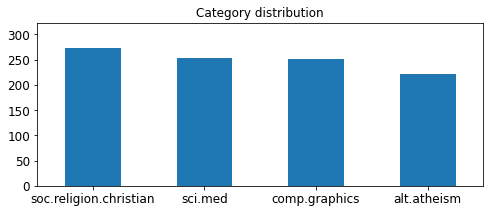

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

X_sample = X.sample(n=1000) #random state

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, max(X_sample.category_name.value_counts())+50], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### **>>> Exercise 8 :**

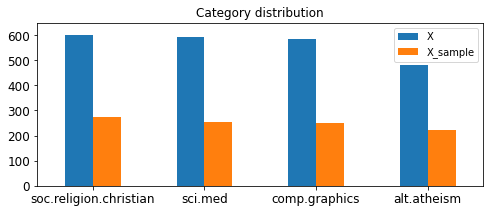

In [13]:
comparision = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
comparision = comparision.set_axis(['X', 'X_sample'], axis='columns')
comparision.plot(kind = 'bar',
                 title = 'Category distribution',
                 ylim = [0, max(X.category_name.value_counts())+50], 
                 rot = 0, fontsize = 12, figsize = (8,3))
plt.show()

### **>>> Exercise 9 (5 min):**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 :**

In [19]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
Matrix = X_counts[4, :50].toarray()
location = np.where(Matrix==1)
print(location)
count_vect.get_feature_names_out()[location[1][1]]

(array([0, 0], dtype=int64), array([ 0, 37], dtype=int64))


'01'

### **>>> Exercise 11 :**

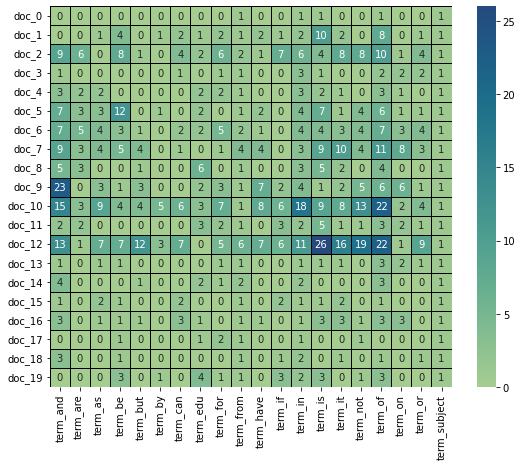

In [20]:
import seaborn as sns

count_vect = CountVectorizer(max_features=30)
X_counts = count_vect.fit_transform(X.text)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[:20]]
plot_z = X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                center = 15,
                linewidths = 0.5,
                linecolor = 'black',
                cmap="crest",
                annot=True)

### **>>> Exercise 12 :**

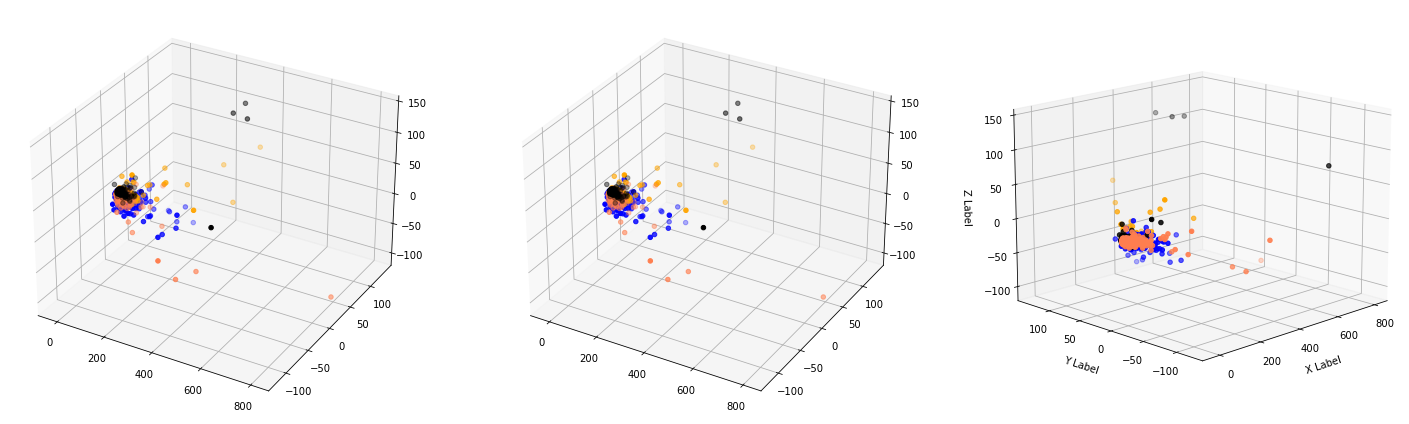

In [21]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
#X_reduced.shape
col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize = (25,10))
ax = []
for i in range(3):
    ax.append(fig.add_subplot(1, 3, i+1, projection='3d'))
    for c, category in zip(col, categories):
        x = X_reduced[X['category_name'] == category].T[0]
        y = X_reduced[X['category_name'] == category].T[1]
        z = X_reduced[X['category_name'] == category].T[2]
        ax[i].scatter(x, y, z, c = c, marker = 'o')
ax[i].grid(color='black', linestyle=':', linewidth=2, alpha=0.2)
ax[i].set_xlabel('\nX Label')
ax[i].set_ylabel('\nY Label')
ax[i].set_zlabel('\nZ Label')
ax[i].view_init(elev=15, azim=45*(2*i+1))

plt.show()        

1. 3D charts can better illustrate relationships between data
2. 3D charts can emphasize data points with specific values

### **>>> Exercise 13 :**

[Text(0, 0, '104'),
 Text(1, 0, '1040'),
 Text(2, 0, '104107'),
 Text(3, 0, '10461'),
 Text(4, 0, '1049'),
 Text(5, 0, '105'),
 Text(6, 0, '105094'),
 Text(7, 0, '10553'),
 Text(8, 0, '105805'),
 Text(9, 0, '10598'),
 Text(10, 0, '106'),
 Text(11, 0, '1060'),
 Text(12, 0, '1065'),
 Text(13, 0, '1066'),
 Text(14, 0, '10665'),
 Text(15, 0, '10669'),
 Text(16, 0, '10679'),
 Text(17, 0, '107'),
 Text(18, 0, '1070'),
 Text(19, 0, '10780'),
 Text(20, 0, '10789'),
 Text(21, 0, '108'),
 Text(22, 0, '1080'),
 Text(23, 0, '10818'),
 Text(24, 0, '10893'),
 Text(25, 0, '109'),
 Text(26, 0, '1095'),
 Text(27, 0, '10983'),
 Text(28, 0, '10984'),
 Text(29, 0, '10fps'),
 Text(30, 0, '10h'),
 Text(31, 0, '10k'),
 Text(32, 0, '10mg'),
 Text(33, 0, '10mhz'),
 Text(34, 0, '10th'),
 Text(35, 0, '10yo'),
 Text(36, 0, '11'),
 Text(37, 0, '110'),
 Text(38, 0, '1100'),
 Text(39, 0, '11004'),
 Text(40, 0, '110mbytes'),
 Text(41, 0, '111'),
 Text(42, 0, '1111'),
 Text(43, 0, '1113'),
 Text(44, 0, '111651'),
 Tex

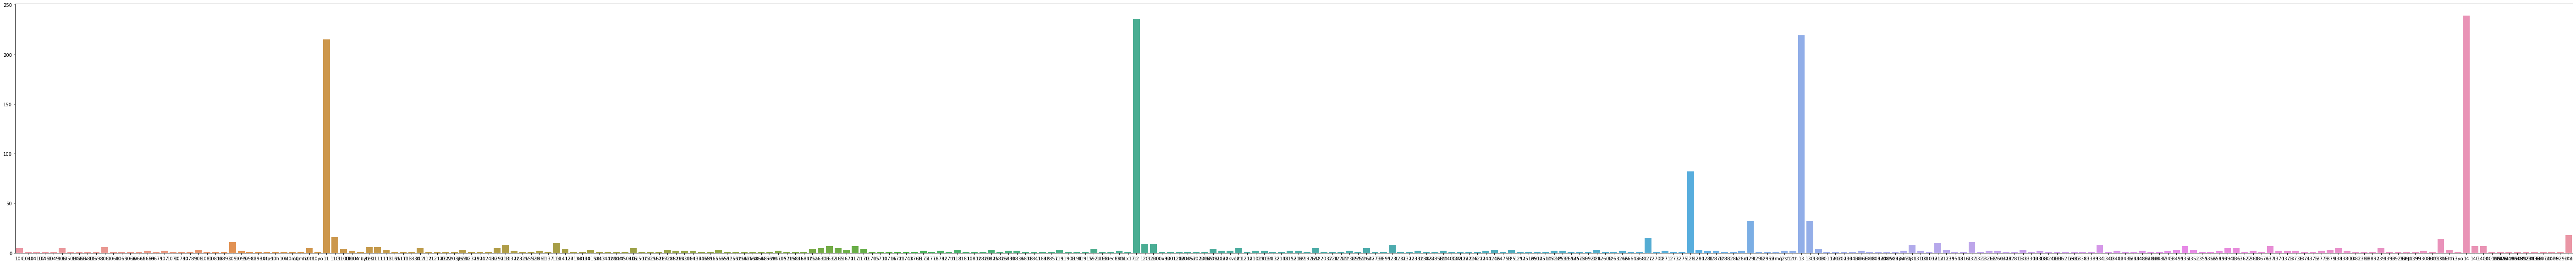

In [22]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]  
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[300:600], 
            y=term_frequencies[300:600])
g.set_xticklabels(count_vect.get_feature_names_out()[300:600])

### **>>> Exercise 14 :**

In [23]:
import plotly.express as px

count_vect = CountVectorizer(max_features=30)   # select the 30 most common words in the data
X_counts = count_vect.fit_transform(X.text)
frequencies = []
for i in range(0,X_counts.shape[1]):
    frequencies.append(sum(X_counts[:,i].toarray()))
frequencies = np.asarray(X_counts.sum(axis=0))[0]
fig = px.bar(frequencies[0:300], x=count_vect.get_feature_names_out()[0:300] ,  
             y=frequencies[0:300])
fig.show()

### **>>> Exercise 15 :**

In [24]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
term_frequencies = np.asarray(X_counts.sum(axis = 0))[0]
sort_index = np.argsort(-term_frequencies)
sorted_freq = term_frequencies[sort_index]
fig = px.bar(sorted_freq[0:300], x=count_vect.get_feature_names_out()[sort_index[0:300]] ,  
             y=sorted_freq[0:300])
fig.show()

### **>>> Exercise 16 :**

Q : Try to generate the binarization using the `category_name` column instead. Does it work?
A : YES

In [25]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


##### **>>> Second Part :**

## 2. Data Preparation

In [227]:
import pandas as pd
import helpers.data_mining_helpers as dmh

# Read file
amazon = pd.read_table("sentiment labelled sentences/amazon_cells_labelled.txt",header=None,names=columns)
imdb= pd.read_table("sentiment labelled sentences/imdb_labelled.txt",header=None,names=columns)
yelp= pd.read_table("sentiment labelled sentences/yelp_labelled.txt",header=None,names=columns)

# add websites column
amazon['websites'] = 'amazon'
imdb['websites'] = 'imdb'
yelp['websites'] = 'yelp'

data = pd.DataFrame({'sentences': sentences, 'labels': labels, 'platforms': platforms})
data

,sentences,labels,platforms
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp
2996,Appetite instantly gone.,0,yelp
2997,Overall I was not impressed and would not go b...,0,yelp
2998,"The whole experience was underwhelming, and I ...",0,yelp


Take at look some of the records that are contained in our subset of the data

In [34]:
data[0:2]

,sentences,labels,platforms
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon


In [143]:
len(data)

3000

In [36]:
data.platforms[:100]

0     amazon
1     amazon
2     amazon
3     amazon
4     amazon
       ...  
95    amazon
96    amazon
97    amazon
98    amazon
99    amazon
Name: platforms, Length: 100, dtype: object

We can also print some example from the subset

### ** >>> Exercise 1 : **  
In this exercise, please print out the *sentences* data for the first tan samples in the dataset. (See the above code for help)

In [51]:
for t in data.sentences[:10]:
    print(t)


So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
The mic is great.
I have to jiggle the plug to get it to line up right to get decent volume.
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.
If you are Razr owner...you must have this!
Needless to say, I wasted my money.
What a waste of money and time!.


## 3. Data Transformation

### 3.2 Familiarizing yourself with the Data

In [128]:
# a simple query for first 10 data
data[:10][["sentences","labels"]]

,sentences,labels
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [127]:
# using loc for first 10 data(by label)
data.loc[:10, 'sentences']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentences, dtype: object

You can also use the `iloc` function to query a selection of our dataset by position.

In [126]:
# using iloc for first 10 data (by position)
data.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentences, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [125]:
data['sentences'].head(10)

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentences, dtype: object

### ** >>> Exercise 3 : **  

In [124]:
data.loc[data['platforms']=='amazon'].iloc[::10][0:5]

,sentences,labels,platforms
0,So there is no way for me to plug it in here i...,0,amazon
10,And the sound quality is great.,1,amazon
20,I went on Motorola's website and followed all ...,0,amazon
30,"This is a simple little phone to use, but the ...",0,amazon
40,"It has a great camera thats 2MP, and the pics ...",1,amazon


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [122]:
# check missing values
data.isnull()

,sentences,labels,platforms
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [121]:
data.isnull().apply(lambda x: dmh.check_missing_values(data))

,sentences,labels,platforms
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 4 :** 
Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  

In [120]:
data.isnull().apply(lambda x: dmh.check_missing_values(data), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [119]:
# create dummy data and check
dummy_series = pd.Series(["dummy_record", 1], index=["sentences", "labels"])
result_with_series = pd.concat([dataset, dummy_series.to_frame().T], ignore_index=True)


In [118]:
# check if the records was commited into result
len(result_with_series)

3001

In [117]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentences,labels,platforms
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [144]:
#The code to drop the record with missing that we just added
data.dropna(inplace=True)
data.isnull().apply(lambda x: dmh.check_missing_values(data))

,sentences,labels,platforms
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [145]:
len(data)

3000

### 4.2 Dealing with Duplicate Data

In [146]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [147]:
sum(data.duplicated())

17

In [148]:
# inplace applies changes directly on our dataframe
data.drop_duplicates(keep=False, inplace=True) 

In [149]:
len(data)

2966

## 5.  Data Preprocessing

### 5.1 Sampling

In [151]:
print(data.shape)

(2966, 3)


In [152]:
# sample 1000 data and print the first 5 data
data_sample = dataset.sample(n=1000,random_state=42)
display(data_sample)

,sentences,labels,platforms
1801,Avoid at ALL costs!,0,imdb
1190,"Garbo, who showed right off the bat that her t...",1,imdb
1817,You will leave the theater wanting to go out a...,1,imdb
251,O my gosh the best phone I have ever had.,1,amazon
2505,I would not recommend this place.,0,yelp
...,...,...,...
618,You need two hands to operate the screen.This ...,0,amazon
406,It's so stupid to have to keep buying new char...,0,amazon
1157,I had to walk out of the theatre for a few min...,0,imdb
1068,This movie totally grates on my nerves.,0,imdb


In [153]:
len(data_sample)

1000

In [154]:
data_sample[0:4]

,sentences,labels,platforms
1801,Avoid at ALL costs!,0,imdb
1190,"Garbo, who showed right off the bat that her t...",1,imdb
1817,You will leave the theater wanting to go out a...,1,imdb
251,O my gosh the best phone I have ever had.,1,amazon


### >>> Exercise 6 :

In [156]:
data_sample = data.sample(n=1000,random_state=42) #random state
print(data['platforms'])
print("------------------------------------------------------------")
print(data_sample['platforms'])

0       amazon
1       amazon
2       amazon
3       amazon
4       amazon
         ...  
2995      yelp
2996      yelp
2997      yelp
2998      yelp
2999      yelp
Name: platforms, Length: 2966, dtype: object
------------------------------------------------------------
2424      yelp
812     amazon
1920      imdb
339     amazon
2049      yelp
         ...  
2467      yelp
283     amazon
1700      imdb
1676      imdb
1667      imdb
Name: platforms, Length: 1000, dtype: object


In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

imdb      994
yelp      992
amazon    980
Name: platforms, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

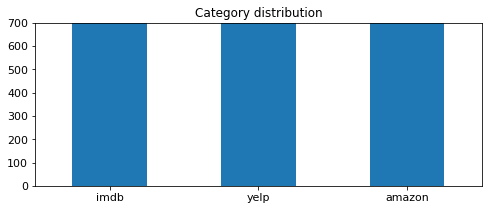

In [160]:
print(data.platforms.value_counts())

# plot barchart for X
X.platforms.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 7 :**

342
amazon    342
imdb      338
yelp      320
Name: platforms, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

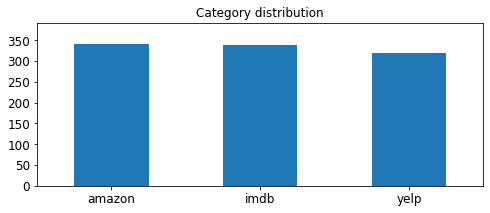

In [164]:
# plot barchart for data_sample
print(max(data_sample.platforms.value_counts()))
upper_bound = max(data_sample.platforms.value_counts() + 50) #277 + 50
print(data_sample.platforms.value_counts())
data_sample.platforms.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 :**

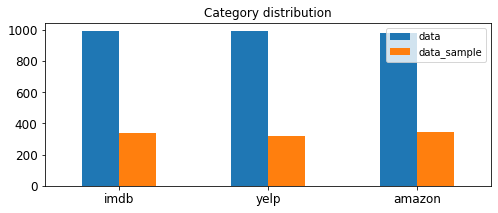

In [165]:
comparision = pd.concat([data.platforms.value_counts(), data_sample.platforms.value_counts()], axis=1)
comparision = comparision.set_axis(['data', 'data_sample'], axis='columns')
comparision.plot(kind = 'bar',
                 title = 'Category distribution',
                 ylim = [0, max(data.platforms.value_counts())+50], 
                 rot = 0, fontsize = 12, figsize = (8,3))
plt.show()

### 5.2 Feature Creation

In [166]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [172]:
data['unigrams'] = dataset['sentences'].apply(lambda x: dmh.tokenize_text(x))

In [173]:
data[0:10]

,sentences,labels,platforms,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,amazon,"[What, a, waste, of, money, and, time, !, .]"


In [179]:
list(data[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection

In [181]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentences) #learn the vocabulary and return document-data matrix
print(data_counts.shape)
print(data_counts[0])

(2966, 5153)
  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [187]:
count_vect.get_feature_names_out()[3456]


'preparing'

In [186]:
count_vect.get_feature_names_out()[546]

'bore'

### **>>> Exercise 9 :**

In [190]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(data.sentences[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [191]:
analyze(" ".join(list(data[:1].sentences)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [202]:
count_vect.get_feature_names_out()[0:1]

array(['all'], dtype=object)

In [194]:
data_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

,term_all,term_and,term_are,term_as,term_be,term_but,term_film,term_for,term_good,term_great,term_have,term_in,term_is,term_it,term_movie,term_my,term_not,term_of,term_on,term_one
doc_0,0,0,0,0,0,0,0,1,0,0,0,2,1,1,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,2
doc_7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
doc_9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


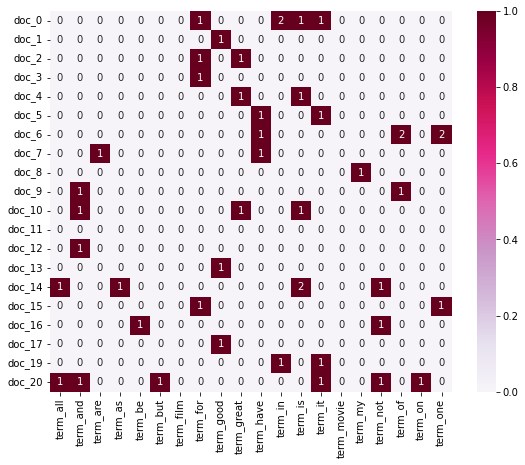

In [219]:
import seaborn as sns

# use seaborn to show the heatmap
count_vect = CountVectorizer(max_features=30)
data_counts = count_vect.fit_transform(data.sentences)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
plot_z = data_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
#print(plot_z)


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [220]:
from sklearn.decomposition import PCA

In [221]:
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentences)
print(data_counts.shape)
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
print(data_reduced.shape)

(2966, 5153)
(2966, 2)


In [222]:
data_reduced.shape

(2966, 2)

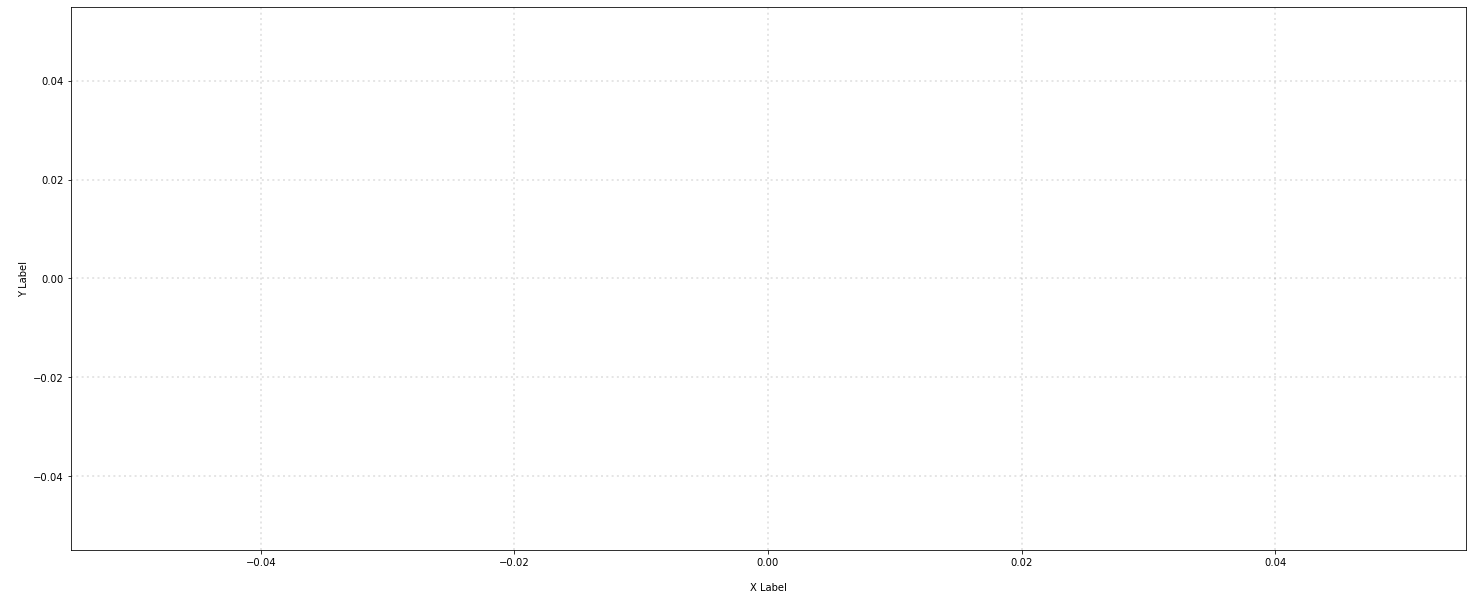

In [223]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = data_reduced[data['platforms'] == category].T[0]
    ys = data_reduced[data['platforms'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

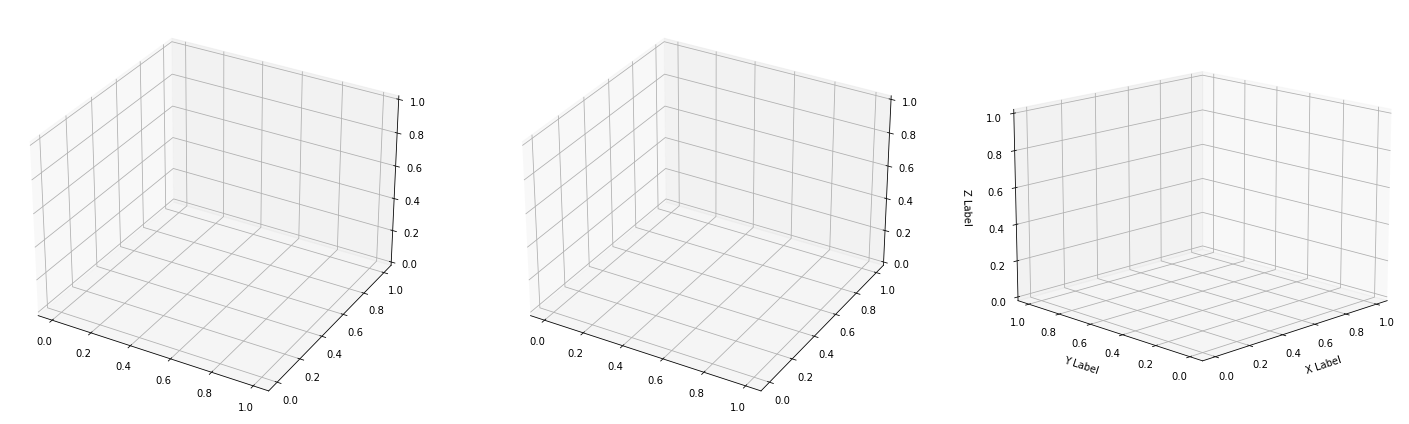

In [224]:
from sklearn.decomposition import PCA
data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())
#X_reduced.shape
col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize = (25,10))
ax = []
for i in range(3):
    ax.append(fig.add_subplot(1, 3, i+1, projection='3d'))
    for c, category in zip(col, categories):
        x = data_reduced[data['platforms'] == category].T[0]
        y = data_reduced[data['platforms'] == category].T[1]
        z = data_reduced[data['platforms'] == category].T[2]
        ax[i].scatter(x, y, z, c = c, marker = 'o')
ax[i].grid(color='black', linestyle=':', linewidth=2, alpha=0.2)
ax[i].set_xlabel('\nX Label')
ax[i].set_ylabel('\nY Label')
ax[i].set_zlabel('\nZ Label')
ax[i].view_init(elev=15, azim=45*(2*i+1))

plt.show()        

### 5.5 Attribute Transformation / Aggregation

In [225]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(data_counts.shape[1])
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

5153


In [229]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

1

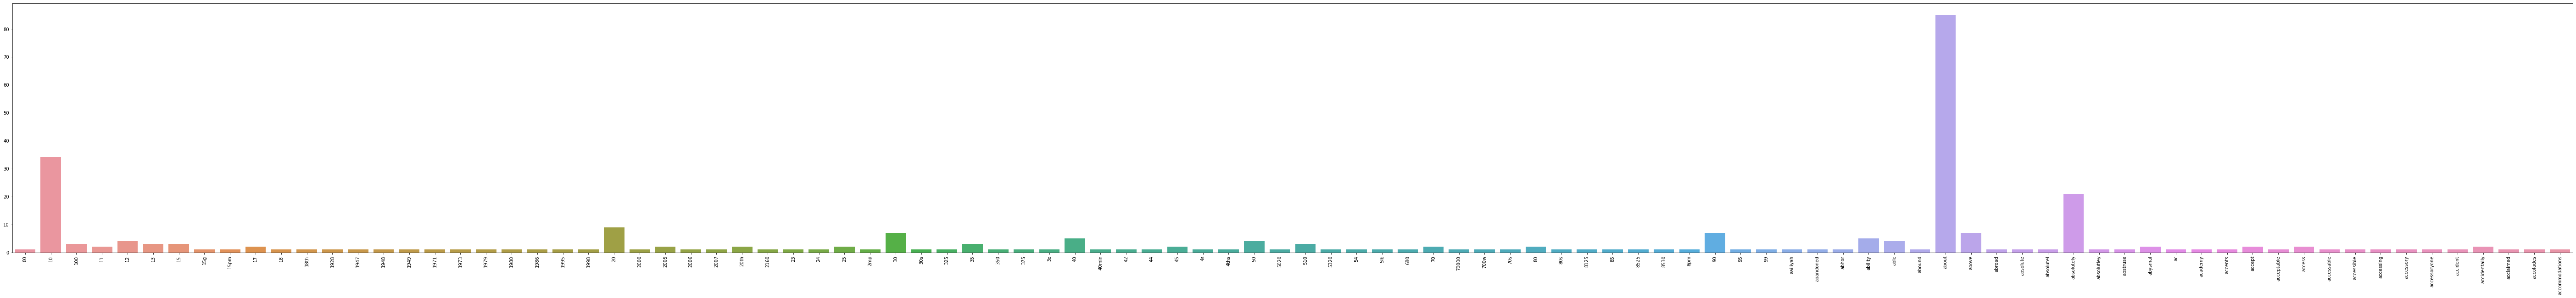

In [231]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

### >>> **Exercise 13:** 

[Text(0, 0, 'ask'),
 Text(1, 0, 'asked'),
 Text(2, 0, 'asking'),
 Text(3, 0, 'asleep'),
 Text(4, 0, 'aspect'),
 Text(5, 0, 'aspects'),
 Text(6, 0, 'ass'),
 Text(7, 0, 'assante'),
 Text(8, 0, 'assaulted'),
 Text(9, 0, 'assistant'),
 Text(10, 0, 'assumed'),
 Text(11, 0, 'assure'),
 Text(12, 0, 'astonishingly'),
 Text(13, 0, 'astronaut'),
 Text(14, 0, 'at'),
 Text(15, 0, 'ate'),
 Text(16, 0, 'atleast'),
 Text(17, 0, 'atmosphere'),
 Text(18, 0, 'atrocious'),
 Text(19, 0, 'atrocity'),
 Text(20, 0, 'att'),
 Text(21, 0, 'attached'),
 Text(22, 0, 'attack'),
 Text(23, 0, 'attacked'),
 Text(24, 0, 'attempt'),
 Text(25, 0, 'attempted'),
 Text(26, 0, 'attempting'),
 Text(27, 0, 'attempts'),
 Text(28, 0, 'attention'),
 Text(29, 0, 'attentive'),
 Text(30, 0, 'attitudes'),
 Text(31, 0, 'attractive'),
 Text(32, 0, 'audience'),
 Text(33, 0, 'audio'),
 Text(34, 0, 'auju'),
 Text(35, 0, 'aurvåg'),
 Text(36, 0, 'austen'),
 Text(37, 0, 'austere'),
 Text(38, 0, 'authentic'),
 Text(39, 0, 'author'),
 Text(40

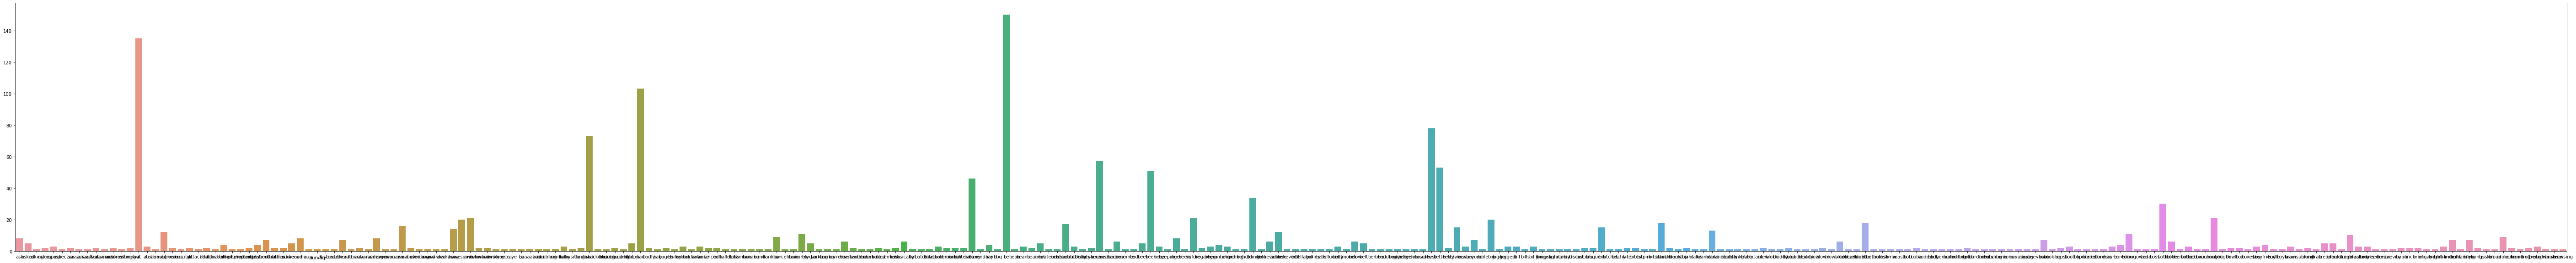

In [240]:
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentences)

term_frequencies = np.asarray(data_counts.sum(axis=0))[0]  
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[300:600], 
            y=term_frequencies[300:600])
g.set_xticklabels(count_vect.get_feature_names_out()[300:600])

### >>> **Exercise 14 :** 

I reduce the number of terms I want to visualize as an exercise efficiently. 

In [239]:
import plotly.express as px

count_vect = CountVectorizer(max_features=30)   # select the 30 most common words in the data
data_counts = count_vect.fit_transform(data.sentences)
frequencies = []
for i in range(0,data_counts.shape[1]):
    frequencies.append(sum(data_counts[:,i].toarray()))
frequencies = np.asarray(data_counts.sum(axis=0))[0]
fig = px.bar(frequencies[0:300], x=count_vect.get_feature_names_out()[0:300] ,  
             y=frequencies[0:300])
fig.show()

### >>> **Exercise 15 :** 

This way the visualization is more meaninfgul and you will be able to observe the so called [long tail]

In [241]:
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentences)
term_frequencies = np.asarray(data_counts.sum(axis = 0))[0]
sort_index = np.argsort(-term_frequencies)
sorted_freq = term_frequencies[sort_index]
fig = px.bar(sorted_freq[0:300], x=count_vect.get_feature_names_out()[sort_index[0:300]] ,  
             y=sorted_freq[0:300])
fig.show()

we can also transform the values in that vector into the log distribution.
It is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe.

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


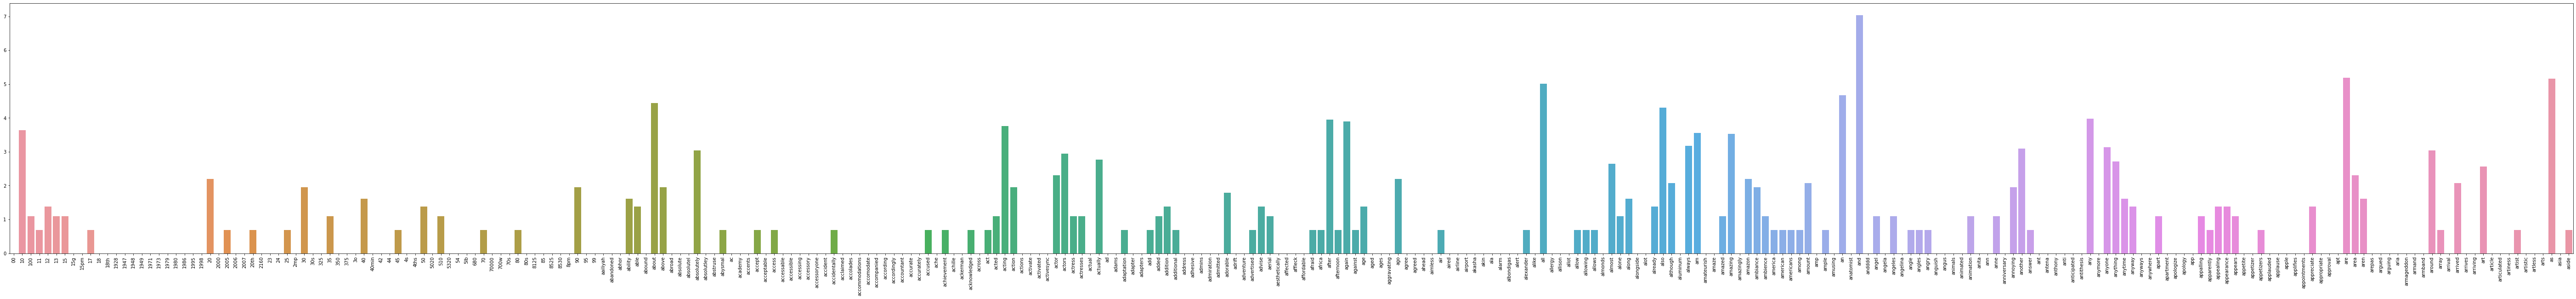

In [243]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### 5.6 Discretization and Binarization

We are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms.

In [244]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(data.platforms)

LabelBinarizer()

In [245]:
data['bin_category'] = mlb.transform(data['platforms']).tolist()

In [250]:
data[0:1500]

,sentences,labels,platforms,bin_category
0,So there is no way for me to plug it in here i...,0,amazon,"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[1, 0, 0]"
4,The mic is great.,1,amazon,"[1, 0, 0]"
...,...,...,...,...
1495,"And I forgot: The Casting here i superb, with ...",1,imdb,"[0, 1, 0]"
1496,This movie is a good and humorous comment on l...,1,imdb,"[0, 1, 0]"
1497,"I found this move beautiful, enjoyable, and up...",1,imdb,"[0, 1, 0]"
1498,"Initially the local sites in the film, which w...",1,imdb,"[0, 1, 0]"


# 6. Data Exploration

In [253]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['platforms']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[1500]
random_record_2 = random_record_2['platforms']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[2000]
random_record_3 = random_record_3['platforms']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['amazon']
['imdb']
['yelp']


In [254]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [255]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 0.000000
